# Time series forecasting, part three of three

Models of forecasting using exponential smoothing are common in business, in particular, in forecasting the demand for supplies and corresponding volume of sales. Exponential smoothing models are easy to use, calculation steps are effortlessly overcome and upgrading in case of new data is smooth.

When forecasting methods are applied, noticeable trend and seasonal periodic variation in the time series is first examined and the forecasting models is then chosen accordingly.

In part one of these notes we considered the case where there is no trend nor periodic variation, and in part two only noticeable trend was taken into account. In this note we concentrate on the case where both trend and periodic seasonal variation is taken into account in the forecast. Such a exponential smoothing forecast model is also called the **Holt-Winter** model.

In the Holt-Winter multiplication model _the level $L$ of the time series at the occasion $t$_ is defined to be

$$ L_t = \alpha \cdot \frac{Y_t}{S_{t-s}} + (1-\alpha) \cdot (L_{t-1} + T_{t-1})$$

Here $Y_t$ is the latest observation, $S_{t-s}$ is the seasonal variation of the previous corresponding period and $T_{t-1}$ is the previous trend.

The _trend $T$ at the occasion $t$_ is given by the formula 

$$ T_t = \beta \cdot (L_t - L_{t-1}) + (1 - \beta) \cdot T_{t-1} $$

Seasonal variation $S$ at the occasion $t$ is obtained from 

$$ S_t = \gamma \cdot \frac{Y_t}{L_t} + (1 - \gamma) \cdot S_{t-s}$$

The forecast at the occasion $t+p$ is now determined by the formula

$$ (L_t + p \cdot T_t) \cdot S_{t-s}$$

Above the Holt-Winter multiplication model is applied. There seasonal variation is taken into account using the seasonal variation factor. The Holt-Winter model can also be applied as an addition model in which seasonal variation is taken into account by adding a seasonal variation term. Multiplication model is better suitable to time series where the size of the seasonal variation component follows the level $L$ of the time series. On the other hand, addition model is better suitable in cases the size of the seasonal variation component does not follow the level $L$ of the time series.

The parameters $\alpha$, $\beta$ and $\gamma$ of the model are tried to find so that the mean of the squares of errors of prediction is as small as possible.

## Using Python with triple exponential smoothing

Exponential smoothing is found in the **statsmodels.tsa** library.

In [1]:
### Import the libraries and functions.

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.api import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

### Use the following layout

plt.style.use('seaborn-whitegrid')

### Studying the time series

In [4]:
### Open the data in a dataframe.

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/time_series.xlsx')

df.head()

,Quarter,Demand
0,2013-12-31,500
1,2014-03-31,350
2,2014-06-30,250
3,2014-09-30,400
4,2014-12-31,450


In [5]:
### Add time labels to the index of the dataframe.
### The function to_datetime transforms appropriate strings to Python's time labels.
### The parameter format permits recognizing different representations as time labels.

df.index = pd.to_datetime(df['Quarter'], format = "%Y-%m-%d")

### Leave out the unnecessary column.

df = df.drop('Quarter', axis = 1)
df.head()

,Demand
Quarter,
2013-12-31,500
2014-03-31,350
2014-06-30,250
2014-09-30,400
2014-12-31,450


<AxesSubplot:xlabel='Quarter'>

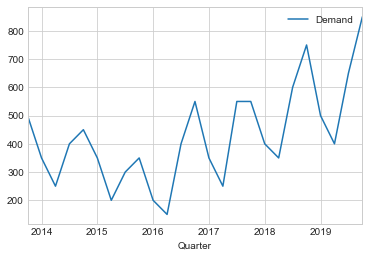

In [6]:
### View the graphical representation of the data.

df.plot()

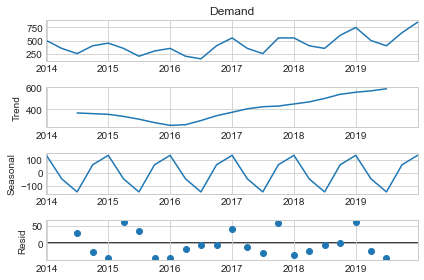

In [7]:
### Separate different components causing variation in the time series.
### Here observed is the original time series, trend is the trend in the series,
### seasonal is the seasonal variation of the time series,
### residual is other variation than the ones related to trend or seasonal.

decompose = seasonal_decompose(df['Demand']).plot()

In this time series there are a noticeable trend and seasonal variation. The data is given in three months intervals and the seasonal variation appears in periods of four observations (quarters of a year).

### Fitting the model

Forecast model is fit (**fit()**) for the data. As a result we'll have an object (in the following named as **model**) which contains diverse information about the model.

For the trend (below **trend**) addition model is used (below **add**). In that case trend is a term added to the time series. This is recommended here.

For the seasonal variation (below **seasonal**) addition model (choice **add**) or multiplication model (choice **mul**) can be used. In multiplication models corresponding factors are used. The reader is encouraged to try both models and become convinced that the used multiplication model turns out to be better. 

For the parameter **seasonal_periods** value four is used as seasonal variation appears in periods of four quarters of a year.

For the parameter **freq** value **'Q'** is used. This is because the data is listed by last days of quarters of a year. More possible values for this parameter can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [9]:
### Fitting the triple exponential smoothing model into the object named model.
### Addition model is used for trend and multiplication model for seasonal variation in this example.

model = ExponentialSmoothing(df['Demand'], trend = 'add', seasonal = 'mul',
                             seasonal_periods = 4, freq = 'Q').fit()

In [10]:
### The object named model gives us simulated forecasts according to the model (fittedvalues) for the already realized occasions.

df['Forecast'] = model.fittedvalues

df

,Demand,Forecast
Quarter,,
2013-12-31,500,500.233428
2014-03-31,350,343.348626
2014-06-30,250,264.968947
2014-09-30,400,447.008075
2014-12-31,450,497.144440
2015-03-31,350,314.179496
2015-06-30,200,262.120076
2015-09-30,300,371.652191
2015-12-31,350,382.469106


<AxesSubplot:xlabel='Quarter'>

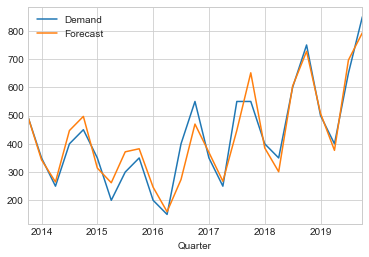

In [11]:
### Compare the original time series and predictions according to the model in a same coordinate system.

df.plot()

In [12]:
### Errors of the prediction (residuals) are found in the the object named model.

df['Residual'] = model.resid

df

,Demand,Forecast,Residual
Quarter,,,
2013-12-31,500,500.233428,-0.233428
2014-03-31,350,343.348626,6.651374
2014-06-30,250,264.968947,-14.968947
2014-09-30,400,447.008075,-47.008075
2014-12-31,450,497.144440,-47.144440
2015-03-31,350,314.179496,35.820504
2015-06-30,200,262.120076,-62.120076
2015-09-30,300,371.652191,-71.652191
2015-12-31,350,382.469106,-32.469106


### Studying the model

There are several ways to estimate how good the prediction model is. In this note we consider

- line chart of time series for errors of forecast
- scatter chart of forecasted values and values of realized observations
- model statistics which is obtained by the function **summary()**.

In particular, when estimating the model, the SSE, sum of squared errors, should be considered. In the modeling the SSE is tried to be minimized.

Text(0, 0.5, 'Error of prediction')

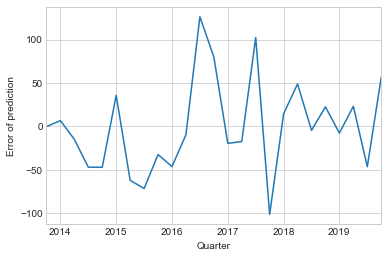

In [13]:
### Draw the errors of forecast as line chart.
### Ideally time series of errors of prediction is random.

df['Residual'].plot()
plt.ylabel('Error of prediction')

Text(0, 0.5, 'Realized demand')

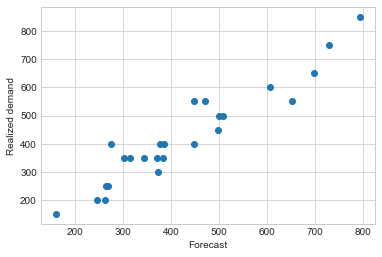

In [14]:
### Draw the scatter chart of the predicted and realized demands.
### The closer the dots follow a straight line from the lower left corner to the top right corner the better the prediction model is.

plt.scatter(x = df['Forecast'], y = df['Demand'])

plt.xlabel('Forecast')
plt.ylabel('Realized demand')

In [16]:
### Statistics for the model

model.summary()

Dep. Variable:,Demand,No. Observations:,25
Model:,ExponentialSmoothing,SSE,71238.850
Optimized:,True,AIC,214.873
Trend:,Additive,BIC,224.624
Seasonal:,Multiplicative,AICC,230.587
Seasonal Periods:,4,Date:,"Thu, 21 Oct 2021"
Box-Cox:,False,Time:,20:15:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8678296,alpha,True
smoothing_trend,0.0002318,beta,True


### Calculating the forecasts

In order to determine time labels for the predictions

- The first time label of the forecasted occasions has to be the next time label after the time series.
- The number of the predicted occasions can be determined using the parameter **periods**.
- The frequency of the predicted occasions has to be the same as the value used for the parameter **freq** in fitting the model.

Further information of possible values for the parameter **freq** can be found at https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases.

In [17]:
### Check the last time label of the time series.

df.tail()

,Demand,Forecast,Residual
Quarter,,,
2018-12-31,750,727.465971,22.534029
2019-03-31,500,507.735170,-7.735170
2019-06-30,400,376.867471,23.132529
2019-09-30,650,696.505144,-46.505144
2019-12-31,850,793.281338,56.718662


In [18]:
### Add time labels for the forecasted occasions.
### The first forecasted occasion is the next time label after the last one of the time series.

index = pd.date_range('2020-03-31', periods = 8, freq = 'Q')

### Predicted values for the following eight quarters.

forecasts = model.forecast(8)

### Add forecasts to the dataframe:

df_forecast = pd.DataFrame(data = forecasts, index = index, columns = ['Forecast'])

df_forecast

,Forecast
2020-03-31,571.291514
2020-06-30,428.642765
2020-09-30,751.059797
2020-12-31,905.759037
2021-03-31,613.394087
2021-06-30,459.661037
2021-09-30,804.443664
2021-12-31,969.014604


<AxesSubplot:xlabel='Quarter'>

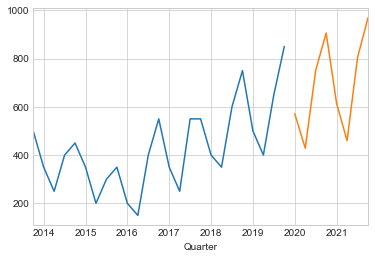

In [19]:
### Next add a line chart of the realized observations.

df['Demand'].plot()

### Add forecasted values to the same coordinate system.

df_forecast['Forecast'].plot()

In [20]:
### Here is a new dataframe with both original time series and calculated forecast.

df1 = pd.concat([df, df_forecast])

df1

,Demand,Forecast,Residual
2013-12-31,500.0,500.233428,-0.233428
2014-03-31,350.0,343.348626,6.651374
2014-06-30,250.0,264.968947,-14.968947
2014-09-30,400.0,447.008075,-47.008075
2014-12-31,450.0,497.144440,-47.144440
2015-03-31,350.0,314.179496,35.820504
2015-06-30,200.0,262.120076,-62.120076
2015-09-30,300.0,371.652191,-71.652191
2015-12-31,350.0,382.469106,-32.469106
2016-03-31,200.0,246.305387,-46.305387


Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>